In [1]:
import cv2
import pydicom as dicom
import numpy as np

In [2]:
def norm(np):
    np = np/(np.max())
    return np

In [180]:
ds=dicom.dcmread('IM66.dcm')
dcm_sample=ds.pixel_array
dcm_sample = norm(dcm_sample)
# dcm_sample[dcm_sample<2170] = 0
dcm_sample[dcm_sample>=0.3] = 1
# dcm_sample=ds.pixel_array*6
while True:
    cv2.imshow('sample image dicom',dcm_sample)

    k = cv2.waitKey(1)
    if k == 27:
        break
cv2.destroyAllWindows()


In [181]:
np = norm(ds.pixel_array)

In [182]:
# np = norm(np)

In [183]:
np.mean()

0.0485678320112727

In [184]:
np.max()

1.0

In [185]:
np.shape

(512, 512)

In [186]:
full = cv2.imread("Fulln.jpg",0)
half = cv2.imread("Halfn.jpg",0)
angle = cv2.imread("Anglen.jpg",0)

In [187]:
cv2.imwrite("sample.jpg",np*255)

True

In [188]:
test = cv2.imread('sample.jpg',0)

In [189]:
# cv2.imshow('test',test)
_,test = cv2.threshold(test,77,255,cv2.THRESH_BINARY)
cv2.imwrite("sample.jpg",np*255)

True

In [190]:
sift = cv2.SIFT_create()

In [191]:
kp1, des1 = sift.detectAndCompute(half,None)
kp2, des2 = sift.detectAndCompute(test,None)

In [192]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [193]:
good = []
for m,n in matches:
    if m.distance <0.85*n.distance:
        good.append([m])

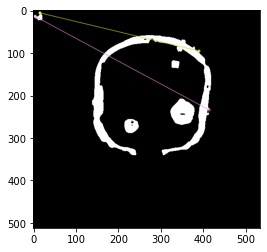

(<matplotlib.image.AxesImage at 0x2abbcfc5f70>, None)

In [194]:
import matplotlib.pyplot as plt
img3 = cv2.drawMatchesKnn(half,kp1,test,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()